# Numpy

Структура занятия:

1) Введение, массивы

2) Доступ к элементам и срезам

3) Выполнение вычислений

4) Индексация

5) Сортировка

6) Структуры

## Введение

Библиотека NumPy предоставляет реализации вычислительных алгоритмов (в виде функций и операторов), оптимизированные для работы с многомерными массивами, структуры NumPy эффективно хранят данные.

Вспомним как хранятся данные в Python...

Целое число в Python - это больше чем просто целое число. Целочисленный тип хранится в виде структуры [языка Си](https://github.com/python/cpython/blob/main/Objects/longobject.c#L140), содержит счётчик ссылок, кодирующий тип, фактическое целочисленное значение и т.д. Это значит, что существует достаточно большая избыточность хранения данных, в сравнении с компилируемыми языками, такими как Си. 

Анаогично, список в Python - это больше чем просто список. Список содержит указатель на блок указателей, каждый из которых, в свою очередь, указывает на целый объект языка Python, например, целое число. 

Преимущество массива Python - гибкость. Недостаток - низкая эффективность хранения данных и их обработки. 

Встроенный модуль `array` можно использовать для плотного (эффективного) хранения данных одного типа.

In [4]:
import array

data = array.array('i', range(100))
data

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
from sys import getsizeof

getsizeof(data), getsizeof(list(range(100)))

(488, 856)

Массивы NumPy, помимо эффективного хранения данных, обеспечивают также возможность выполнения эффективных операций над этими данными.

In [3]:
pip install numpy


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np

np.array(range(100))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

Важно отметить, что массивы NumPy могут содержать элементы только одного типа. Если типы элементов не совпадают, NumPy пытается привести элементы к одному типу

In [11]:
np.array(list(range(10)) + [0.1])

array([0. , 1. , 2. , 3. , 4. , 5. , 6. , 7. , 8. , 9. , 0.1])

In [12]:
np.array(list(range(10)) + ['1'])

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '1'],
      dtype='<U21')

In [13]:
np.array(list(range(10)) + [0.1, '1'])

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0.1', '1'],
      dtype='<U32')

Есть возможность явно задать тип массива

In [14]:
np.array(range(10), dtype='float64')

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Все типы

In [27]:
np.sctypes

{'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64],
 'float': [numpy.float16, numpy.float32, numpy.float64],
 'complex': [numpy.complex64, numpy.complex128],
 'others': [bool, object, bytes, str, numpy.void]}

Как ещё можно создать массив:

In [15]:
# массив нулей
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
# массив как range
np.arange(20, 40, 2)

array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38])

In [19]:
# 3х мерный массив из списков
np.array([[1,2,3], [4,5,6], [7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [20]:
# массив единиц
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [21]:
# диагональная матрица
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
# матрица c равномерно распределёнными случайными значениями
np.random.random((3, 2))

array([[0.0515375 , 0.06191523],
       [0.18875236, 0.28293345],
       [0.28229626, 0.66037485]])

In [25]:
# матрица c нормально распределёнными случайными значениями с медианой 0 и ст. отклонением 2
np.random.normal(0, 2, (3, 2))

array([[ 3.5850644 , -0.86103683],
       [ 3.23679337,  1.78356202],
       [-0.8343157 ,  0.84043357]])

## Доступ к элементам

Доступ по индексам

In [45]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
A[1, 2]

6

In [46]:
A[1, -1]

6

In [47]:
B = A.copy()  # обратите внимание, создаётся полная копия!
B[1][2] = 66
B

array([[ 1,  2,  3],
       [ 4,  5, 66],
       [ 7,  8,  9]])

In [48]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [49]:
a = [[1,2,3], [4,5,6], [7,8,9]]
b = a.copy()  # при работе со списком, создаётся поверхностная копия
b[1][2] = 66
b

[[1, 2, 3], [4, 5, 66], [7, 8, 9]]

In [50]:
a

[[1, 2, 3], [4, 5, 66], [7, 8, 9]]

In [51]:
A[::-1]

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

Дополнительные возможности работы со срезами

In [52]:
A[:2, :2]  # 2 строки и 2 столбца

array([[1, 2],
       [4, 5]])

In [53]:
A[:2, ::2]  # 2 строки и каждый 2-й столбец

array([[1, 3],
       [4, 6]])

In [54]:
A[::-1, ::-1]  # пееворачивание подмассивов

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

In [56]:
A[:, 0] # первый столбец

array([1, 4, 7])

In [59]:
A[1, :] # вторая строка

array([4, 5, 6])

Срезы возвращают не копии массивов, а их предсавления. Это значит что изменение помассива (среза) повлечёт за собой изменение исходного массива. Для создания копий, необходимо использовать метод `.copy()`

In [60]:
a_sub = A[:2, :2]
a_sub

array([[1, 2],
       [4, 5]])

In [61]:
a_sub[0, 0] = 100
A

array([[100,   2,   3],
       [  4,   5,   6],
       [  7,   8,   9]])

Можно изменять форму массива при помощи метода `.reshape()`. При этом, размер исходного массива и преобразования должны соответствовать друг другу.

In [67]:
# поместим числа от 1 до 10 в таблицу 3x3
np.arange(1, 10).reshape((3, 3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [77]:
np.arange(12).reshape((2, 6))

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

При помощи методов `.concatenate()`, `.split()` массивы можно объединять и разбивать

In [78]:
np.concatenate([A, A])

array([[100,   2,   3],
       [  4,   5,   6],
       [  7,   8,   9],
       [100,   2,   3],
       [  4,   5,   6],
       [  7,   8,   9]])

In [79]:
np.concatenate([A, A], axis=1)

array([[100,   2,   3, 100,   2,   3],
       [  4,   5,   6,   4,   5,   6],
       [  7,   8,   9,   7,   8,   9]])

In [80]:
np.split(A, [1, 1])  # кроме массива задаём точки раздела

[array([[100,   2,   3]]),
 array([], shape=(0, 3), dtype=int64),
 array([[4, 5, 6],
        [7, 8, 9]])]

In [81]:
np.split(A, [1, 1], axis=1)  # кроме массива задаём точки раздела

[array([[100],
        [  4],
        [  7]]),
 array([], shape=(3, 0), dtype=int64),
 array([[2, 3],
        [5, 6],
        [8, 9]])]

## Выполнение вычислений

Ключ к ускорению обработки массивов - использование векторизованных операций.

Многие (но не все) функции NumPy работают с разблокированным GIL!

Сравим скорость обработки массива стандартным способом, то есть при помощи цикла и использование веркоризованных (направленных на вектор) операций.

In [87]:
def compute_negative(arr):
    result = np.empty(len(arr))
    for i in range(len(arr)):
        result[i] = -arr[i]
    return result

V = np.random.random(size=100_000)
%timeit compute_negative(V)  # через цикл

8.79 ms ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
%timeit (-V)  # через векторизованные операции

32.3 µs ± 162 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Векторизованные операции реализованы посредством *универсальных функций*, которые позволяют быстро выполнять повторяющиеся операции на массивах NumPy 

Универсальные функции делятся на унарные и бинарные, список:
- унарные: `-`, `np.abs()`, `np.sin()`, `np.log()`, `np.exp()`, и т.д.
- бинарные: `+`, `-`, `*`, `**`, `/`, `//`, `%`, и т.д.

Арифметические операторы являются адаптерами для функций, например `+` = `np.add()`

Все универсальные функции имеют дополнительный метод `.reduce()`

In [12]:
A = np.random.random(size=100_000)
np.add.reduce(A)

49871.49733812176

Агрегирования:

In [13]:
# сумма
np.sum(A)

49871.49733812176

In [14]:
# минимум и максимум
np.min(A), np.max(A)

(3.4093716778649252e-06, 0.999990464957956)

In [7]:
M = np.random.random((3, 3))
M

array([[0.04322121, 0.42138783, 0.45157952],
       [0.71176784, 0.45886873, 0.81536882],
       [0.62185557, 0.59421035, 0.14436555]])

In [8]:
np.sum(M)

4.262625431580285

In [9]:
np.sum(M, axis=0)

array([1.37684462, 1.47446691, 1.4113139 ])

In [10]:
np.sum(M, axis=1)

array([0.91618856, 1.9860054 , 1.36043147])

Возможные агрегирования:
- `np.sum` - сумма
- `np.mean` - среднее
- `np.std` - стандартное отклонение
- `np.var` - дисперсия
- `np.median` - медиана
- `np.percentile` - квантили элементов
- `np.all` - все ли элементы истины
- `np.any` - есть ли среди элементов истинный

Транслирования - правила применения бинарных универсальных функций к массивам различной длины.

In [11]:
M + 5  # простой случай - сложение применяется ко всем элементам

array([[5.04322121, 5.42138783, 5.45157952],
       [5.71176784, 5.45886873, 5.81536882],
       [5.62185557, 5.59421035, 5.14436555]])

In [12]:
M + M  # простой случай - сложение происходит попарно между элементами с одинаковыми индексами

array([[0.08644243, 0.84277566, 0.90315904],
       [1.42353567, 0.91773747, 1.63073765],
       [1.24371114, 1.1884207 , 0.28873111]])

In [13]:
M + np.array([1, 2, 3])  # сложение происходит по столбцам

array([[1.04322121, 2.42138783, 3.45157952],
       [1.71176784, 2.45886873, 3.81536882],
       [1.62185557, 2.59421035, 3.14436555]])

In [14]:
M + np.array([1, 2, 3]).reshape((3, 1))  # сложение по строкам

array([[1.04322121, 1.42138783, 1.45157952],
       [2.71176784, 2.45886873, 2.81536882],
       [3.62185557, 3.59421035, 3.14436555]])

Маски. Универсальные функции `>`, `<`, `=`, `!=` позволяют создать маски, то есть классифицировать данные по какому либо признаку, преобразовать массивы к виду истина / ложь. Это необходимо, если мы хотим ответить на какой-либо конкретный вопрос

In [15]:
M

array([[0.04322121, 0.42138783, 0.45157952],
       [0.71176784, 0.45886873, 0.81536882],
       [0.62185557, 0.59421035, 0.14436555]])

In [16]:
M.mean()

0.473625047953365

In [17]:
M > M.mean()

array([[False, False, False],
       [ True, False,  True],
       [ True,  True, False]])

In [18]:
M.sum()

4.262625431580285

In [19]:
np.sum(M > M.mean())  # сочетание агрегации и маски

4

Условия можно сочетать при помощи логических операторов `&` (and), `|` (or), `^` (xor), `~` (not)

In [20]:
(M > M.mean()) | (M == M.min())

array([[ True, False, False],
       [ True, False,  True],
       [ True,  True, False]])

### Пример. Статистики по росту людей

In [37]:
import csv

heights = []

with open("weight_height.csv") as csvfile:
    r = csv.DictReader(csvfile)
    for i in r:
        heights.append(float(i['Height']))

In [38]:
heights_arr = np.array(heights)

In [39]:
heights_arr

array([187.57142322, 174.70603628, 188.2396677 , ..., 162.22470022,
       175.34697755, 157.33838453])

In [40]:
heights_arr.mean(), heights_arr.max(), heights_arr.min()

(168.57360177724598, 200.6568055598296, 137.82835864574665)

In [41]:
heights_arr.std(), np.median(heights_arr), np.percentile(heights_arr, 75), np.percentile(heights_arr, 25)

(9.772232778476152, 168.447898007733, 175.70262478616016, 161.30427602229614)

Так как куда интереснее видеть графическое представление данных, воспользуемся библиотекой `matplotlib`. Она отлично интегрированна в Jupyter

In [42]:
pip install matplotlib


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([137.82835865, 144.11120334, 150.39404803, 156.67689272,
        162.95973741, 169.2425821 , 175.52542679, 181.80827149,
        188.09111618, 194.37396087, 200.65680556]),
 <BarContainer object of 10 artists>)

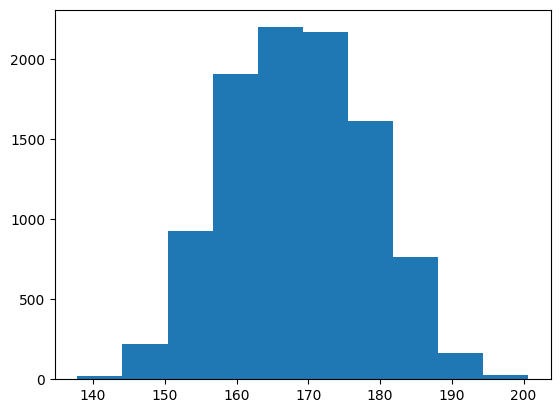

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(heights_arr)

Точные численные данные

In [44]:
np.count_nonzero(heights_arr)

10000

In [45]:
h_h = np.percentile(heights_arr, 98)
np.count_nonzero(heights_arr >= h_h), np.count_nonzero(heights_arr < h_h), h_h

(200, 9800, 187.92422965671105)

In [46]:
l_h = np.percentile(heights_arr, 2)
np.count_nonzero(heights_arr >= l_h), np.count_nonzero(heights_arr < l_h), l_h

(9800, 200, 149.75824261557102)

## Индексация

In [47]:
A = np.random.randint(0, 20, size=12)
A

array([ 1, 13,  2,  2,  4, 14,  6, 12,  0, 15, 12, 15])

Нужные элементы можно запрашивать напрямую, с указанием индексов 

In [48]:
[A[1], A[5], A[3]]

[13, 14, 2]

Но лучшим способом является передача массива индексов

In [49]:
idx = [1, 5, 3]
A[idx]

array([13, 14,  2])

Такая индексация работает с многомерными массивами, при этом необходимо передавать индексы нужных измерений для каждого элемента

In [50]:
A = np.random.randint(0, 20, size=12).reshape((4, 3))
A

array([[ 0, 11,  4],
       [17, 13, 11],
       [13, 14, 13],
       [ 9,  3,  0]])

In [51]:
row = [0, 1, 3]
col = [0, 2, 2]
A[row, col]

array([ 0, 11,  0])

Можно совмещать простые индексы и массивы индексов

In [52]:
row = 1
col = [0, 2, 2]
A[row, col]

array([17, 11, 11])

Частая сфера применения разного рода индексаций - выборка подмножеств данных, например, для разделения датасетов на обучающую и тестовую выборки.

In [53]:
import csv

weights = []

with open("weight_height.csv") as csvfile:
    r = csv.DictReader(csvfile)
    for i in r:
        weights.append(float(i['Weight']))
        
weights_arr = np.array(weights)

In [54]:
np.count_nonzero(heights_arr), np.count_nonzero(weights_arr)

(10000, 10000)

In [55]:
heights_arr.shape, weights_arr.shape

((10000,), (10000,))

In [56]:
X = np.stack([heights_arr, weights_arr], axis=-1)  # объединили рост и вес по индексу записи

In [57]:
X.shape

(10000, 2)

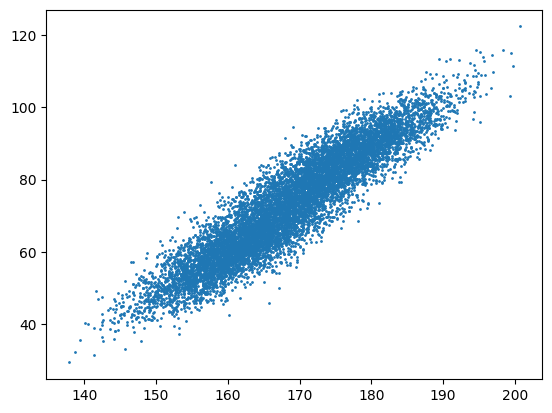

In [58]:
plt.scatter(X[:, 0], X[:, 1], s=1)

1000 случайных элементов отберём для теста, используя индексацию

In [59]:
indexes = np.random.choice(X.shape[0], 1000, replace=False)

In [60]:
indexes

array([5879, 4565, 7617, 7988, 5365, 6026, 3654, 9429, 2273,  380, 5570,
       5980, 1913, 8271,  297, 6052, 3127, 7408, 7045, 9339, 7987, 3859,
       5557, 9363, 6346, 6397, 3538, 1574, 4250,  208, 6882, 5544, 5810,
       4097, 9273, 2303, 3104, 1800,   74, 4338, 8136, 8986, 4591, 2832,
       3980, 2205, 1076, 3325, 8763, 8817, 6991, 2347, 5601, 2222, 2317,
       6281, 8174, 9727, 9032, 5260, 7652, 2553, 3010, 6734, 1738,  784,
        726,  255,   40, 9064,  349, 6756, 2902, 5862, 8501, 7993, 8321,
       5421, 5877, 2578, 4863, 7862, 4142, 4593, 5444, 8177, 9720,   14,
       7455, 3443, 7949,  661,  333,  728, 7208, 7018, 6492, 8246, 9172,
       7635, 2297, 7262, 5678, 7179, 8316, 1796, 1377, 4383, 7634, 9210,
       3501, 2876, 3176, 4878, 4397, 8144, 3884, 3305,  692, 8585, 7853,
       1225,  698, 4462, 6296, 3514, 8488, 7825, 9995, 1872, 4480, 8685,
       9147,  622, 7363, 2221, 7159, 1696, 1674, 6560, 8349,  758, 4201,
       3494, 7802, 4252, 3736, 9901, 7990, 8590, 69

In [61]:
selected_test = X[indexes]
selected_test.shape

(1000, 2)

Визуализируем тестовую выборку на данных

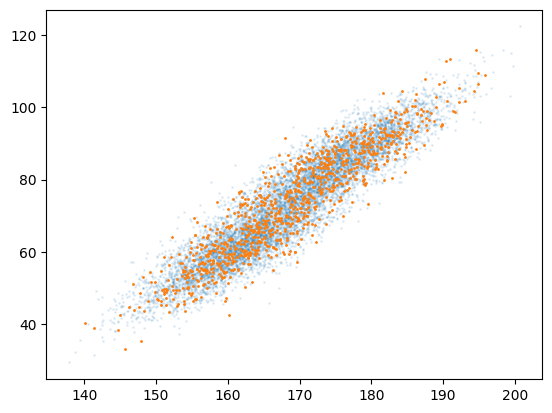

In [62]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.1, s=1)
plt.scatter(selected_test[:, 0], selected_test[:, 1], s=1)


## Сортировка

По умолчанию используется метод timsort, хотя по желанию можно использовать heapsort, quicksort, mergesort.

In [63]:
A = np.random.randint(0, 20, size=12)
A

array([ 8, 10,  3, 14, 15,  4, 15, 10,  1,  6, 13,  7])

In [64]:
B = A.copy()
B.sort()
B

array([ 1,  3,  4,  6,  7,  8, 10, 10, 13, 14, 15, 15])

Также есть функция `argsort`, которая возвращает индексы отсортированных элементов

In [67]:
C = A.copy()
x = C.argsort()
x

array([ 8,  2,  5,  9, 11,  0,  1,  7, 10,  3,  4,  6])

In [68]:
X

array([[187.57142322, 109.70229623],
       [174.70603628,  73.61019162],
       [188.2396677 ,  96.48111363],
       ...,
       [162.22470022,  58.2654507 ],
       [175.34697755,  74.30950628],
       [157.33838453,  51.54154316]])

С сортировкой 2-х мерных (многомерных) массивов сложнее: все строки и столбцы рассматриваются как отдельные элементы и взаимосвязи между ними теряются

In [224]:
x_sorted = X.copy()
x_sorted.sort()  # сортируем столбцы - данные смешиваются
x_sorted

array([[109.70229623, 187.57142322],
       [ 73.61019162, 174.70603628],
       [ 96.48111363, 188.2396677 ],
       ...,
       [ 58.2654507 , 162.22470022],
       [ 74.30950628, 175.34697755],
       [ 51.54154316, 157.33838453]])

In [225]:
x_sorted = X.copy()
x_sorted.sort(axis=0)  # сортируем строки - и так данные смешиваются
x_sorted

array([[137.82835865,  29.34246109],
       [138.72681889,  31.28459415],
       [139.37926793,  32.37811734],
       ...,
       [199.46165448, 115.95956228],
       [199.69828988, 116.03778979],
       [200.65680556, 122.44430771]])

In [216]:
X[X.T[0] > 198]  # рост больше

array([[198.36350338, 115.95956228],
       [199.29361442, 103.10320403],
       [200.65680556, 122.44430771],
       [199.46165448, 115.14240537],
       [199.69828988, 111.44389239]])

In [217]:
X[X.T[0] < 140]  # рост меньше

array([[138.72681889,  32.37811734],
       [139.37926793,  35.64928359],
       [137.82835865,  29.34246109]])

In [221]:
X[X.T[1] > 115]  # вес больше

array([[198.36350338, 115.95956228],
       [194.60856668, 116.03778979],
       [200.65680556, 122.44430771],
       [199.46165448, 115.14240537],
       [195.19585362, 115.28756153]])

In [223]:
X[X.T[1] < 35]  # вес меньше

array([[141.39723339,  31.28459415],
       [138.72681889,  32.37811734],
       [137.82835865,  29.34246109],
       [145.67685561,  32.9932629 ]])

## Структуры данных

Можно задать контейнеры с именованными полями, таким образом, связать данные в структуры

In [69]:
types = {
    'names': ('heights', 'weights'),
    'formats': ('float32', 'float32'),
}
data = np.zeros(10000, dtype=types)
data['heights'] = heights_arr
data['weights'] = weights_arr

In [70]:
data['heights']

array([187.57143, 174.70604, 188.23967, ..., 162.2247 , 175.34698,
       157.33838], dtype=float32)

In [71]:
data[0]

(187.57143, 109.70229)

In [72]:
data.sort()

In [73]:
data[:10]

array([(137.82835, 29.34246 ), (138.72682, 32.378117),
       (139.37927, 35.649284), (140.07733, 40.277737),
       (140.55469, 40.075546), (141.3558 , 38.830738),
       (141.39723, 31.284594), (141.57893, 49.034904),
       (141.86208, 47.059925), (142.18716, 38.73811 )],
      dtype=[('heights', '<f4'), ('weights', '<f4')])

In [249]:
data[-10:]

array([(195.83621, 109.05005 ), (195.98843, 103.72213 ),
       (196.71442, 105.5107  ), (196.76254, 114.53818 ),
       (196.96985, 109.76924 ), (198.36351, 115.959564),
       (199.29361, 103.1032  ), (199.46165, 115.1424  ),
       (199.69829, 111.44389 ), (200.6568 , 122.444305)],
      dtype=[('heights', '<f4'), ('weights', '<f4')])

Данные связяны, сортировка корректна!